# Assignment: Unsupervised Machine Learning \ Clustering

## Part 1: Partitional Clustering

In this assignment you will experience with partitional & mixture model clustering. The analyses are made on real datasets under the circumstances of real life challenges in unsupervised machine learning.

In [1]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

### Read blood test results as an EMR from an Excel file

In [2]:
# Open the file
xlsx = pd.ExcelFile('EMR-Blood.xlsx')

# Get the first sheet as an object
sheet1 = xlsx.parse(0)

# Set the Key column as the index
sheet1.set_index("Key", inplace=True)

# Show first 10 rows
sheet1[:10]

,Na,K,ALT,AST,WBC,RBC,Hgb,Hct
Key,,,,,,,,
1,141,4.65,31.92,35.01,10.25,4.06,17.6,36.3
2,140,4.96,36.41,16.70,6.13,3.80,13.2,35.6
3,136,3.66,41.43,13.17,5.86,4.26,16.2,43.7
4,136,4.74,23.92,30.33,10.80,4.83,16.1,49.8
5,140,4.74,43.66,20.44,6.59,4.05,12.6,39.1
6,146,3.98,48.41,33.22,4.53,4.04,17.9,47.3
7,144,5.29,44.29,19.28,10.12,3.96,17.2,47.9
8,138,4.57,50.43,16.39,4.66,4.91,13.7,41.5
9,144,3.96,31.51,34.87,4.57,4.72,15.1,47.6


### Blood Test Abbreviations
- Na == Sodium
- K == Potassium
- ALT == Alanine transaminase
- AST == Aspartate transaminase
- WBC == White blood cells
- RBC == Red blood cells
- Hgb == Hemoglobin
- Hct == Hematocrit

### Use K-Means to create clusters according to variables of uniform distribution

In [3]:
# Retrieve the K, WBC and Hgb column values from the dataset to cluster
variables1 = ["K","WBC","Hgb"]
EMR3d1 = sheet1.loc[:, variables1].values

# Run the K-Means algorithm, assuming the correct number of clusters is 5
y_pred_KMeans1 = KMeans(n_clusters=5).fit(EMR3d1).predict(EMR3d1)

### Make a 3D chart

C:\Users\yosefos\AppData\Local\Temp\ipykernel_9676\1526041088.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


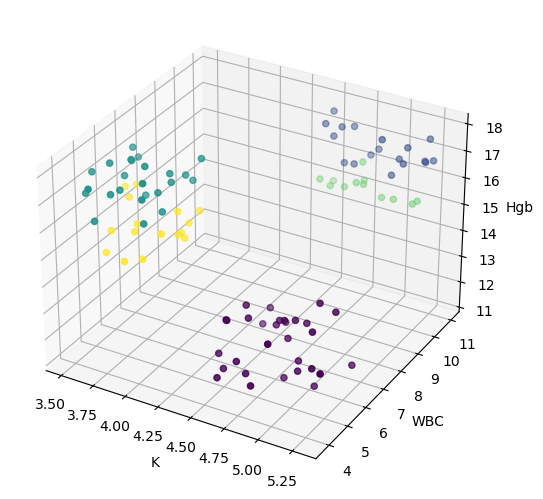

In [4]:
def make_chart (chart_data, y_pred, labels):
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.set_zlabel(labels[2])
    ax.scatter(chart_data[:,0], chart_data[:,1], chart_data[:,2], c=y_pred)

make_chart(EMR3d1, y_pred_KMeans1, variables1)

## Task 1 (_max score - 50 points_)
Implement  Lloyd's Algorithm for solving the K-Means problem, as shown in class. 
By examining the WCSS, choose a proper threshold to determine algorithm convergence.

Check your algorithm on 'EMR-Blood.xlsx' dataset. Compare your results to the _sklearn_ version - what can affect any differences you might've got?

In [190]:
points = np.array( [ [1,1],[2,1],[1,2],[2,2]])
labels = np.array([0,0,1,1])
center = np.array([ [2,1], [1.5,2]])

# WCSS = np.sum((arr[None,:,:] - center[:,None,:])**2,axis=-1)
for i,loc in enumerate(center):
    # curr_center = np.expand_dims(loc,axis=-1)
    curr_center=loc
    curr_points = points[labels == i]
    WCSS = np.sum(np.sum(( curr_center - curr_points)**2,axis=1))
    print(( curr_center - curr_points)**2)
    print(WCSS)


[[1. 0.]
 [0. 0.]]
1.0
[[0.25 0.  ]
 [0.25 0.  ]]
0.5


In [198]:
# Add your code for task 1 after this line, and keep it in this cell.

# Implement K-Means (X being the data)
class k_means:
    def __init__(self,k,X):
        self.n_clusters = k 
        self.data = X
    # Generate random initial coordinates (X.shape[1] features) for the k clusters, from uniform distribution.

        # Iitialize centers location array
        self.centroids = np.zeros([k,X.shape[1]]) 

        # Iterate over each axis of X
        for axis in range((X.shape[1])):
            axis_min = np.min(X[:,axis])
            axis_max = np.max(X[:,axis])
            # Generate random location for current axis
            self.centroids[:,axis] = np.random.uniform(low = axis_min, high = axis_max,size = k)

    
    def fit(self):
        
        # Initialize WCSS , and epochs used later to terimnate alogrithm.
        WCSS_previous = np.inf
        WCSS_curr = 0
        epochs = 0

        # While delta WCSS is more than threshold or more than 1000 epochs were made
        while np.abs(WCSS_previous - WCSS_curr) > 20 and epochs < 10000: 
            # update WCSS_previous 
            WCSS_previous = WCSS_curr
            WCSS_curr= 0
            epochs+=1
            # Calculate distance of each point from centroids ( axis 0 is centroid number, axis 1 is data point number)
            distance_matrix = np.sqrt(np.sum((self.centroids[:, None, :] - self.data[None, :, :])**2, axis=-1))

            # Assaign closest centroid to each train data point
            self.assaigned_cluster = np.argmin(distance_matrix,axis=0)




            # Iterate over all centroid
            for centroid_n,centroid in enumerate(self.centroids):
                # Update current centroid coordinates to the mean of all the points assaigned to that centroid (aka cluster).

                self.centroids[centroid_n] = np.mean(self.data[ self.assaigned_cluster == centroid_n],axis=0)
                # Calculate WCSS
                curr_center = self.centroids[centroid_n] 
                curr_points = self.data[self.assaigned_cluster == centroid_n] 
                WCSS_curr += np.sum(np.sum(( curr_center - curr_points)**2,axis=1))

            # Check that all centroids have assainged points (centroid elements containing NaN means no point was assaigned to it, because of first line in for loop)
            if np.any(np.isnan(self.centroids)):
                # Generate random initial coordinates (X.shape[1] features) for the k clusters, from uniform distribution.

                 # Iitialize centers location array
                self.centroids = np.zeros([self.n_clusters,self.data.shape[1]]) 

                 # Iterate over each axis of X
                for axis in range((self.data.shape[1])):
                    axis_min = np.min(self.data[:,axis])
                    axis_max = np.max(self.data[:,axis])
                # Generate random location for current axis
                    self.centroids[:,axis] = np.random.uniform(low = axis_min, high = axis_max,size = self.n_clusters)
                
               


        self.WCSS = WCSS_curr

    def predict(self, X):
        # Calculate distance of each point from centroids (axis 0 is centroid , axis 1 is data points)
        distance_matrix = np.sqrt(np.sum((self.centroids[:, None, :] - X[None, :, :])**2, axis=-1))

        # Label data and return output
        return np.argmin(distance_matrix,axis=0)













In [ ]:
#### REMOVE LATER, THIS IS A TEST THAT THE FUNCTION WORKS

# data1 = np.random.uniform(0,1,size=[300,2])
# data2 = np.random.uniform(2,3,size=[300,2])

# data = np.concatenate((data1,data2),axis=0)
# model = k_means(2,data)
# model.fit()

# red = data[model.assaigned_cluster == 0]
# blue = data[model.assaigned_cluster == 1]
# test = np.array([ [1.5,1], [1.5,3]])
# centers = model.centroids
# plt.scatter(red[:,0],red[:,1],c='red')
# plt.scatter(blue[:,0],blue[:,1],c='blue')
# plt.scatter(centers[:,0],centers[:,1],c = "black")


# plt.scatter(test[:,0],test[:,1],c=model.predict(centers))

from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=10000, n_features=2, centers=2, random_state=42)

np.random.seed(6)


### This is a case where my algorithm dosen't predict well most of the times
# How it should look like:

# plt.subplot(1,2,1)
# colors = ["red","yellow"]
# y = [colors[label] for label in y]
# plt.scatter(X[:,0],X[:,1], c=y)
# plt.title("Real")

# # Mine
# plt.subplot(1,2,2)
# model = k_means(2,X)
# model.fit()
# y = model.predict(X)
# colors = ["red","yellow"]
# y = [colors[label] for label in y]
# plt.scatter(X[:,0],X[:,1], c=y)
# plt.title("Me")

model = k_means(2,X)
model.fit()


## Task 2 (_max score - 30 points_)

Humans can clearly spot 3 clusters, however, for machines it's much harder to "learn" that. In the above implementation, K-Means was given the value of 5 as K.
Develop a **generic** mechanism for finding the most reasonable number of clusters by:
1. Iterating K over a reasonable range, which should be derived from the number of points
2. Choose a proper K based on the heuristics learned in class
3. Showing the final clusters in a 3D chart (for your implementation of K-Means algorithm)

c:\Users\yosefos\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\yosefos\anaconda3\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


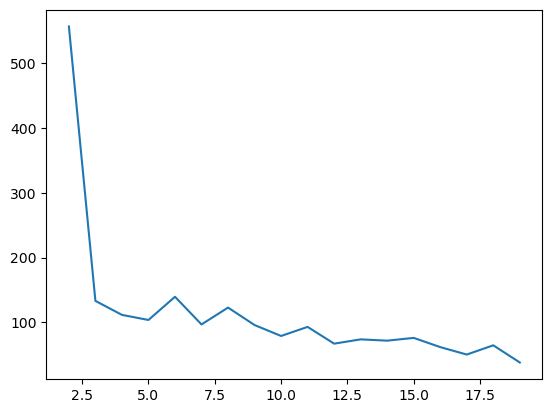

In [199]:
# 1. Loop over square root of number of points
# 2. Find elbow
# 3. Print 

EMR3d1.shape
WCSS_list = []
for k in range(2,20):
    model = k_means(k,EMR3d1)
    model.fit()
    WCSS_list.append(model.WCSS)

plt.plot(range(2,20),WCSS_list)





### Silhouette analysis

Use graphic visualization of the Silhouette score to support your above answer:

In [79]:
# Add your code for the Sillhouette graphic analysis
# You can use scikit-learn Sillhouette page as a reference

from sklearn.metrics import silhouette_samples, silhouette_score

def plot_Silhouette(X, y, num_clusters):
    # YOUR CODE HERE
    pass


#### From this section on - please use the sklearn's K-means

## Part 2: Mixture Models Clustering 

### Use K-Means to create clusters according to variables of both uniform and Gaussian distributions

In [80]:
# Retrieve the ALT, AST and RBC column values from the dataset to cluster
variables2 = ["ALT","AST","RBC"]
EMR3d2 = sheet1.loc[:, variables2].values

# Run the K-Means algorithm
# NOTICE, this time, we know that the correct number of clusters is 2
y_pred_KMeans2 = # YOUR CODE HERE

# Make a 3D chart
make_chart(EMR3d2, y_pred_KMeans2, variables2)

SyntaxError: invalid syntax (2259868397.py, line 7)

## Task 3 (_max score - 20 points_)
Scientists have found that in this population of patients, RBC distribution is uniform, ALT distribution is a Gaussian and AST distribution is a mixture of two Gaussians. Clearly, even by giving K-Means the correct K, the algorithm got to the wrong conclusion. This separation is "technically" correct, but lacks some underlying understanding of the natural phenomena.

What is the "problem" with this separation?

In [ ]:
# Your answer here


: 

In order to exploit the Gaussian characteristic of the AST
1. Find the 2 componenets that comprise the AST feature by applying the GMM algorith with the proper number of components.
2. Assume that the clusters above are correct for the entire dataset (including the other features).
3. Show the final clusters (of EMR3d2) in a 3D chart

In [ ]:
# Add your code for task3 after this line, and keep it in this cell.




: 

What is the difference between the two clustering results above?

Which one, given the domain knowledge provided to you, makes more sense?




# Good Luck!

